In [2]:
import numpy as np
import pandas as pd
import os
os.chdir('C:\\Users\\Documents\\Tencent Files\\1344408330\\FileRecv\\python评分卡\\data\\')
import matplotlib.pyplot as plt
%matplotlib inline
sample_window = pd.read_csv("CreditSampleWindow.csv",encoding="utf8")

In [3]:
sample_window.notnull().sum()

CID           1813157
STAGE_BEF     1663660
STAGE_AFT     1663660
START_DATE    1663660
CLOSE_DATE    1663660
dtype: int64

In [4]:
sample_window.dropna(subset = ["STAGE_BEF","STAGE_AFT"],inplace = True)

In [5]:
sample_window["START_MONTH"] = sample_window.START_DATE.apply(lambda x :int(x//100))

In [6]:
sample_window["CLOSE_MONTH"] = sample_window.CLOSE_DATE.apply(lambda x :int(x//100))

In [7]:
df =pd.read_csv("cs-training.csv")
df.info()
df.describe(include= "all")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
%%cmd
pip install missingno

Microsoft Windows [版本 6.1.7601]
版权所有 (c) 2009 Microsoft Corporation。保留所有权利。

C:\Users\CDA\Documents\Tencent Files\1344408330\FileRecv\python评分卡预习课件20190215\Python评分卡预习课件20190215\data>pip install missingno

C:\Users\CDA\Documents\Tencent Files\1344408330\FileRecv\python评分卡预习课件20190215\Python评分卡预习课件20190215\data>

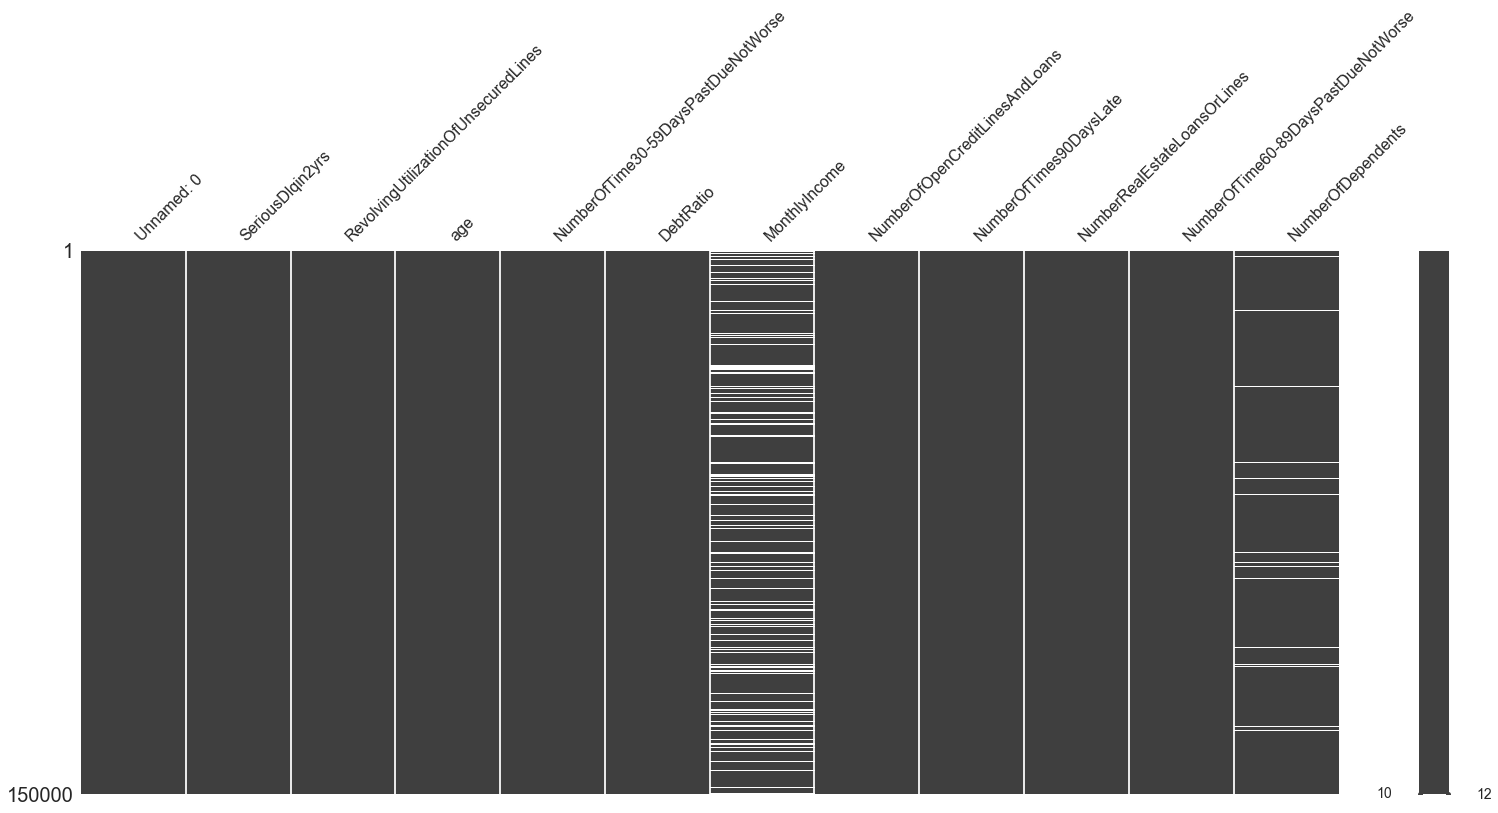

In [9]:
import missingno as msno
msno.matrix(df);

In [10]:
train_data = df.iloc[:,1:]

In [11]:
train_data 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [12]:
median = train_data.MonthlyIncome.median()
median
train_data.MonthlyIncome.fillna(value=median, inplace=True)
train_data.dropna(inplace=True)
train_data.isnull().mean()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

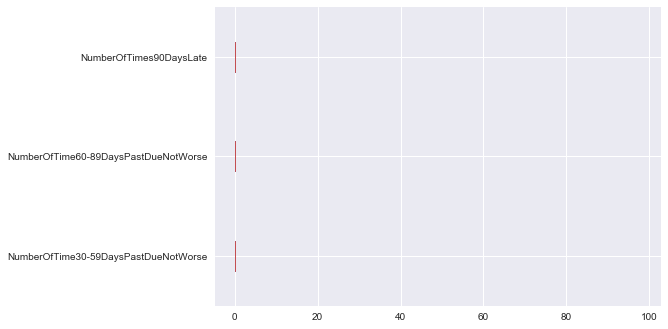

In [13]:
train_data = train_data.loc[train_data.age>0]
import matplotlib.pyplot as plt    
columns = ["NumberOfTime30-59DaysPastDueNotWorse",
"NumberOfTime60-89DaysPastDueNotWorse",
"NumberOfTimes90DaysLate"]
train_data[columns].plot.box(vert=False);    
for col in columns:
    train_data = train_data.loc[train_data[col] < 90]    

In [14]:
from sklearn.model_selection import train_test_split
Y = train_data['SeriousDlqin2yrs']
X = train_data.iloc[:, 1:]
X_train, X_vali, Y_train, Y_vali = train_test_split(X, Y, test_size=0.3)
model_data = pd.concat([Y_train, X_train], axis=1)
vali_data = pd.concat([Y_vali, X_vali], axis=1)

In [15]:
model_data["SeriousDlqin2yrs"].value_counts()

0    95286
1     6799
Name: SeriousDlqin2yrs, dtype: int64

In [16]:
import sys
sys.path.append(r"C:\Users\CDA\Documents\Tencent Files\1344408330\FileRecv\Python评分卡预习课件20190215\Python评分卡预习课件20190215")

In [17]:
pd.read_csv

<function pandas.io.parsers._make_parser_function.<locals>.parser_f>

In [18]:
from auto_bin import AutoBins

In [19]:
bins_data = AutoBins(model_data, "SeriousDlqin2yrs")

In [20]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [21]:
num_bins, woe_df, iv = bins_data.auto_bins("age",n=5)

对 age 列进行分箱: 
分组个数: 20 	iv值: 0.24702997956637304
分组个数: 19 	iv值: 0.247027818073411
分组个数: 18 	iv值: 0.2470172877114561
分组个数: 17 	iv值: 0.24699457299036798
分组个数: 16 	iv值: 0.2469422124608057
分组个数: 15 	iv值: 0.2469084772484212
分组个数: 14 	iv值: 0.24684411692101138
分组个数: 13 	iv值: 0.2467502665345478
分组个数: 12 	iv值: 0.24660914873941392
分组个数: 11 	iv值: 0.24629624167941977
分组个数: 10 	iv值: 0.24564091756118228
分组个数: 09 	iv值: 0.24528527327821428
分组个数: 08 	iv值: 0.24486683406998241
分组个数: 07 	iv值: 0.24342523344232464
分组个数: 06 	iv值: 0.24204348908436013
分组个数: 05 	iv值: 0.2389075493338763

最后分箱情况: 
分组个数: 05 	iv值: 0.2389075493338763

分组woe情况：
         min        max  count_0  count_1  total  percentage  bad_rate  \
0       -inf  36.000000    14525     1766  16291    0.159583  0.108403   
1  36.000000  46.000000    19785     1853  21638    0.211961  0.085636   
2  46.000000  56.000000    23243     1814  25057    0.245452  0.072395   
3  56.000000  62.000000    13348      696  14044    0.137572  0.049559   
4  62.000

In [22]:
num_bins, woe_df, iv = bins_data.auto_bins("RevolvingUtilizationOfUnsecuredLines",n = 5)

对 RevolvingUtilizationOfUnsecuredLines 列进行分箱: 
分组个数: 19 	iv值: 1.1521211659700463
分组个数: 18 	iv值: 1.152119869373406
分组个数: 17 	iv值: 1.1520559645215709
分组个数: 16 	iv值: 1.1517149408387763
分组个数: 15 	iv值: 1.151430618974635
分组个数: 14 	iv值: 1.1506511182005916
分组个数: 13 	iv值: 1.1487696056478085
分组个数: 12 	iv值: 1.1477936193517926
分组个数: 11 	iv值: 1.144247745284261
分组个数: 10 	iv值: 1.1410580733139646
分组个数: 09 	iv值: 1.1394075950039102
分组个数: 08 	iv值: 1.1356345538581794
分组个数: 07 	iv值: 1.1290560214802463
分组个数: 06 	iv值: 1.1066211298494462
分组个数: 05 	iv值: 1.0938002932262705

最后分箱情况: 
分组个数: 05 	iv值: 1.0938002932262705

分组woe情况：
        min       max  count_0  count_1  total  percentage  bad_rate       woe
0      -inf  0.212760    54990     1157  56147    0.550002  0.020607  1.221214
1  0.212760  0.450595    14573      739  15312    0.149993  0.048263  0.341521
2  0.450595  0.699045     9324      885  10209    0.100005  0.086688 -0.285348
3  0.699045  1.000000    15001     3161  18162    0.177911  0.174045 -1.0828

In [23]:
num_bins, woe_df, iv = bins_data.auto_bins("NumberOfTime30-59DaysPastDueNotWorse",n=3)

对 NumberOfTime30-59DaysPastDueNotWorse 列进行分箱: 
分组个数: 03 	iv值: 0.701228348617564

最后分箱情况: 
分组个数: 03 	iv值: 0.701228348617564

分组woe情况：
        min       max  count_0  count_1  total  percentage  bad_rate       woe
0      -inf  0.000000    82215     3473  85688    0.839379  0.040531  0.524212
1  0.000000  1.000000     9406     1646  11052    0.108263  0.148932 -0.897108
2  1.000000       inf     3665     1680   5345    0.052358  0.314312 -1.860073


In [26]:
num_bins, woe_df, iv = bins_data.auto_bins("DebtRatio",n=5)

对 DebtRatio 列进行分箱: 
分组个数: 20 	iv值: 0.08628529890850707
分组个数: 19 	iv值: 0.08626672156348708
分组个数: 18 	iv值: 0.0862185875710489
分组个数: 17 	iv值: 0.08614367844978191
分组个数: 16 	iv值: 0.08592894494315276
分组个数: 15 	iv值: 0.08575331565482106
分组个数: 14 	iv值: 0.08551097172344335
分组个数: 13 	iv值: 0.08519809513126317
分组个数: 12 	iv值: 0.08473113011535008
分组个数: 11 	iv值: 0.08430908249404731
分组个数: 10 	iv值: 0.08328976777442908
分组个数: 09 	iv值: 0.08172273139407449
分组个数: 08 	iv值: 0.07890233467674052
分组个数: 07 	iv值: 0.07699604699641911
分组个数: 06 	iv值: 0.07367103979321159
分组个数: 05 	iv值: 0.06411782045596245

最后分箱情况: 
分组个数: 05 	iv值: 0.06411782045596245

分组woe情况：
           min          max  count_0  count_1  total  percentage  bad_rate  \
0         -inf     0.004863     4870      235   5105    0.050007  0.046033   
1     0.004863     0.516196    57508     3742  61250    0.599990  0.061094   
2     0.516196     1.328349    13728     1585  15313    0.150002  0.103507   
3     1.328349  1155.600000     9472      736  10208  

In [27]:
bins_num = {
"RevolvingUtilizationOfUnsecuredLines":5,
"age":5,
"NumberOfTime30-59DaysPastDueNotWorse":3,
"DebtRatio":5,
"MonthlyIncome":6,
"NumberOfOpenCreditLinesAndLoans":4,
"NumberOfTimes90DaysLate":2,
"NumberRealEstateLoansOrLines":4,
"NumberOfTime60-89DaysPastDueNotWorse":2,
"NumberOfDependents":4,
}

In [28]:
info_values = {}
woe_values = {}
bins_values = {}
for key in bins_num:
    num_bins, woe_df, iv = bins_data.auto_bins(key, n=bins_num[key], show_iv=False)
    info_values[key] = iv
    woe_values[key] = woe_df
    bins_values[key] = [x[0] for x in num_bins] + [float("inf")]

对 MonthlyIncome 列进行分箱: 
对 age 列进行分箱: 
对 NumberOfDependents 列进行分箱: 
对 NumberRealEstateLoansOrLines 列进行分箱: 
对 NumberOfOpenCreditLinesAndLoans 列进行分箱: 
对 NumberOfTime30-59DaysPastDueNotWorse 列进行分箱: 
对 NumberOfTime60-89DaysPastDueNotWorse 列进行分箱: 
对 DebtRatio 列进行分箱: 
对 RevolvingUtilizationOfUnsecuredLines 列进行分箱: 
对 NumberOfTimes90DaysLate 列进行分箱: 


In [29]:
info_values

{'DebtRatio': 0.06411782045596245,
 'MonthlyIncome': 0.07473567200344344,
 'NumberOfDependents': 0.03596418823491201,
 'NumberOfOpenCreditLinesAndLoans': 0.07304275895618581,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.701228348617564,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.5152428340454849,
 'NumberOfTimes90DaysLate': 0.8000907449514089,
 'NumberRealEstateLoansOrLines': 0.0593496488947593,
 'RevolvingUtilizationOfUnsecuredLines': 1.0938002932262705,
 'age': 0.2389075493338763}

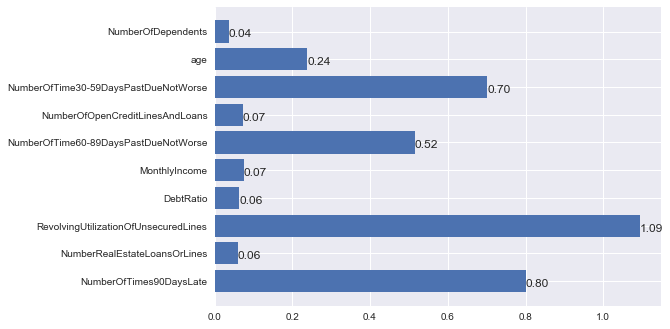

In [30]:
def plt_iv(info_values):
    keys,values = zip(*info_values.items())
    nums = range(len(keys))
    plt.barh(nums,values)
    plt.yticks(nums,keys)
    for i, v in enumerate(values):
        plt.text(v, i-.2, "{:.2f}".format(v))
plt_iv(info_values)

In [31]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
12966,0,0.003266,61,0,0.044991,1666.0,3,0,0,0,1.0
142384,0,0.951581,54,1,3253.000000,5400.0,17,0,0,0,0.0
51521,0,0.001923,35,0,0.108699,7000.0,3,0,1,0,1.0
3141,0,0.159942,62,0,0.348915,9583.0,10,0,1,0,1.0
126376,0,0.355037,41,0,0.358835,9201.0,13,0,2,0,0.0


In [32]:
model_woe = pd.DataFrame(index=model_data.index)
woe_values['age']#["woe"]

,min,max,count_0,count_1,total,percentage,bad_rate,woe
0,-inf,36.000000,14525,1766,16291,0.159583,0.108403,-0.532953
1,36.000000,46.000000,19785,1853,21638,0.211961,0.085636,-0.271989
2,46.000000,56.000000,23243,1814,25057,0.245452,0.072395,-0.089638
3,56.000000,62.000000,13348,696,14044,0.137572,0.049559,0.313665
4,62.000000,inf,24385,670,25055,0.245433,0.026741,0.954338


In [33]:
for col in bins_values:
    bins = bins_values[col]
    labels = woe_values[col]["woe"]
    model_woe[col] = pd.cut(model_data[col], bins, labels=labels).astype(np.float)
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
model_woe.head(5)

,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfTime60-89DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfDependents,SeriousDlqin2yrs
12966,0.373862,-0.239882,1.221214,0.092196,-0.406926,0.265308,-0.041176,0.524212,0.313665,-0.113206,0
142384,0.373862,-0.239882,-1.082879,0.323992,0.148078,0.265308,0.127823,-0.897108,-0.089638,0.159729,0
51521,0.373862,0.227605,1.221214,0.092196,0.148078,0.265308,-0.041176,0.524212,-0.532953,-0.113206,0
3141,0.373862,0.227605,1.221214,0.092196,0.437902,0.265308,0.127823,0.524212,0.313665,-0.113206,0
126376,0.373862,0.227605,0.341521,0.092196,0.148078,0.265308,0.127823,0.524212,-0.271989,0.159729,0


In [34]:
model_woe.to_csv('WoeData.csv',encoding="utf8", index=False)

In [35]:
import statsmodels.api as sm
data = pd.read_csv('WoeData.csv',encoding="utf8")
endog = data['SeriousDlqin2yrs']
X = data.drop(["SeriousDlqin2yrs",
               "NumberRealEstateLoansOrLines",
               "NumberOfDependents"],axis=1)
exog = sm.add_constant(X)
logit = sm.Logit(endog,exog)
result = logit.fit()
#result.summary()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.183959
         Iterations 8


In [36]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               102085
Model:                          Logit   Df Residuals:                   102076
Method:                           MLE   Df Model:                            8
Date:                Wed, 20 Mar 2019   Pseudo R-squ.:                  0.2484
Time:                        10:24:40   Log-Likelihood:                -18779.
converged:                       True   LL-Null:                       -24986.
                                        LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6160      0.015   -171.135      0.000      -2.646      -2.586
NumberOfTimes90DaysLate                 -0.5531      0.014    -39.199      0.000      -0.581      -0.525
RevolvingUtilizationOfUnsecuredLines    -0.6185      0.015    -41.886      0.000      -0.647      -0.590
DebtRatio                               -0.7038      0.057    -12.407      0.000      -0.815      -0.593
MonthlyIncome                           -0.2448      0.053     -4.578      0.000      -0.350      -0.140
NumberOfTime60-89DaysPastDueNotWorse    -0.4154      0.018    -23.527      0.000      -0.450      -0.381
NumberOfOpenCreditLinesAndLoans         -0.2057      0.052     -3.994      0.000      -0.307      -0.105
NumberOfTime30-59DaysPastDueNotWorse    -0.5441      0.016    -33.628      0.000      -0.576      -0.512
age                                     -0.4743      0.032    -14.612      0.000      -0.538      -0.411
========================================================================================================
"""

In [38]:
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_values:
    bins = bins_values[col]
    labels = woe_values[col]["woe"]
    vali_woe[col] = pd.cut(vali_data[col], bins, labels=labels).astype(np.float)
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_Y = vali_woe['SeriousDlqin2yrs']
vali_X = vali_woe.drop(["SeriousDlqin2yrs",
"NumberRealEstateLoansOrLines",
"NumberOfDependents"],axis=1)

In [39]:
vali_X

,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfTime60-89DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,age
117947,0.373862,-0.285348,0.092196,0.437902,0.265308,0.127823,0.524212,-0.271989
32171,0.373862,0.341521,-0.481254,0.437902,0.265308,0.127823,0.524212,0.313665
132657,0.373862,1.221214,0.092196,0.148078,0.265308,0.127823,0.524212,0.954338
84312,0.373862,1.221214,0.092196,0.148078,0.265308,0.127823,0.524212,-0.089638
25646,0.373862,1.221214,0.323992,0.148078,0.265308,0.127823,-0.897108,0.954338
86511,0.373862,1.221214,-0.481254,-0.187210,0.265308,0.127823,0.524212,0.954338
114124,-2.282074,1.221214,-0.481254,0.437902,0.265308,0.127823,-1.860073,-0.089638
127037,-2.282074,0.341521,0.092196,0.148078,0.265308,0.127823,-1.860073,-0.089638
16143,0.373862,1.221214,0.092196,-0.406926,0.265308,0.127823,0.524212,-0.271989
93254,0.373862,1.221214,0.092196,0.148078,0.265308,0.127823,0.524212,-0.271989


In [120]:
vali_exog = sm.add_constant(vali_X)
vali_proba = result.predict(vali_exog)

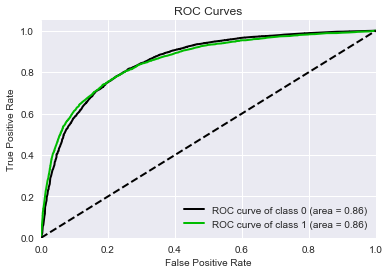

In [122]:
import scikitplot as skplt
vali_proba_df = pd.DataFrame(vali_proba,columns=[1])
vali_proba_df.insert(0,0,1-vali_proba_df)
skplt.metrics.plot_roc(vali_Y,
                        vali_proba_df,
                        plot_micro=False,
                        plot_macro=False);

In [126]:
 result.params

const                                  -2.625708
NumberOfTime30-59DaysPastDueNotWorse   -0.546617
RevolvingUtilizationOfUnsecuredLines   -0.605662
NumberOfTimes90DaysLate                -0.535086
age                                    -0.465900
DebtRatio                              -0.693520
MonthlyIncome                          -0.281304
NumberOfOpenCreditLinesAndLoans        -0.379191
NumberOfTime60-89DaysPastDueNotWorse   -0.420993
dtype: float64

In [128]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
base_score = A - B*result.params["const"]
base_score

557.6241119489439

In [130]:
# 将评分卡写入文件
file = "ScoreData.csv"
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for col in result.params.index[1:]:
    temp = woe_values[col]
    score = temp["woe"] * (-B*result.params[col])
    score.name = "Score"
    score.index = [("{:.2f}".format(temp.loc[x, "min"]),"{:.2f}".format(temp.loc[x, "max"])) for x in temp.index]
    score.index.name = col
    score.to_csv(file,header=True,mode="a")